# Create basic graph visualizations with SeaBorn- The Most Awesome Python Library For Visualization yet

When it comes to data preparation and getting acquainted with data, the one step we normally skip is the data visualization. 

While a part of it could be attributed to the lack of good visualization tools for the platforms we use, most of us also get lazy at times.

Now as we know of it Python never had any good Visualization library. For most of my plotting needs, I would read up blogs, hack up with StackOverflow solutions and haggle with [Matplotlib](http://matplotlib.org/) documentation each and every time I needed to make a simple graph. This led me to think that a Blog post to create common Graph types is in order. But being the procrastinator that I am it always got pushed to the back of my mind. 

But, yesterday I got introduced to [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) and I must say I am quite impressed with it. It makes beautiful graphs that are in my opinion better than R's [ggplot2](http://ggplot2.org/). Gives you enough options to customize and the best part is that it is so easy to learn. You just need to familiarize yourself with a few of the key concepts and you are good to go.

So I am finally writing this blog post with a basic purpose of creating a code base that provides me with ready to use codes which could be put into analysis in a fairly straight-forward manner.
Right. So here Goes.
We Start by importing the libraries that we will need to use.

In [384]:
%matplotlib inline 
import matplotlib.pyplot as plt #sets up plotting under plt
import seaborn as sns #sets up styles and gives us more plotting options
import pandas as pd #lets us handle data as dataframes

Lets import the data that we are going to use.

In [385]:
tips = sns.load_dataset("tips")

In [386]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#Scatterplot With Regression Line

Now let us work on visualizing this data.

We will use the [**regplot**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.regplot.html#seaborn.regplot) option in seaborn. 


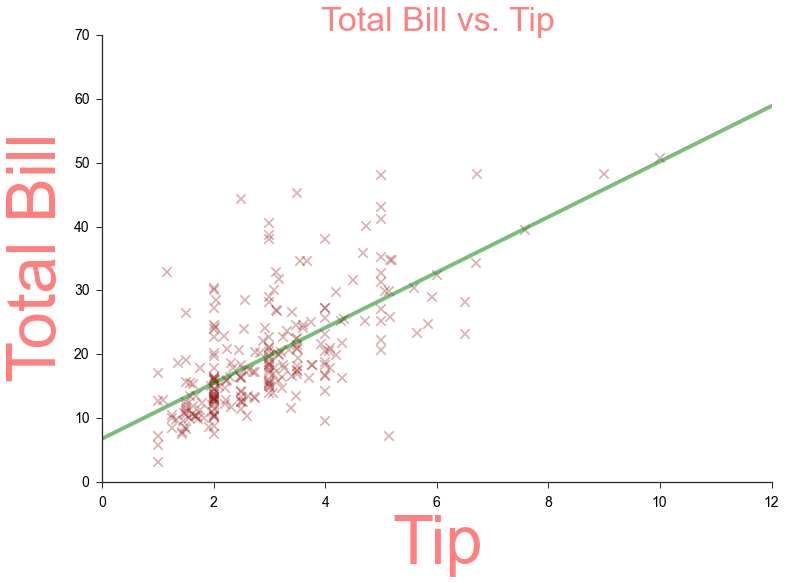

In [387]:
sns.set(style="ticks") # We dont Probably need the Gridlines. Do we? If yes comment this line

# Here we create a matplotlib axes object. The extra parameters we use 
# "ci" to remove confidence interval
# "marker" to have a x as marker. 
# "scatter_kws" to provide style info for the points.[s for size]
# "line_kws" to provide style info for the line.[lw for line width]

g = sns.regplot(x="tip", y="total_bill", data=tips, ci = False, scatter_kws={"color":"darkred","alpha":0.3,"s":90},
           line_kws={"color":"g","alpha":0.5,"lw":4},marker="x")

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,8)
# Set the Title of the graph from here
g.axes.set_title('Total Bill vs. Tip', fontsize=34,color="r",alpha=0.5)
# Set the xlabel of the graph from here
g.set_xlabel("Tip",size = 67,color="r",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Total Bill",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")


Now that required a bit of a code but i feel that it looks much better than what either Matplotlib or ggPlot2 could have rendered. We got a lot of customization without too much code.

But that is not really what actually made me like Seaborn. The plot type that actually got my attention was [**lmplot**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.lmplot.html#seaborn.lmplot), which lets us use **regplot** in a faceted mode.

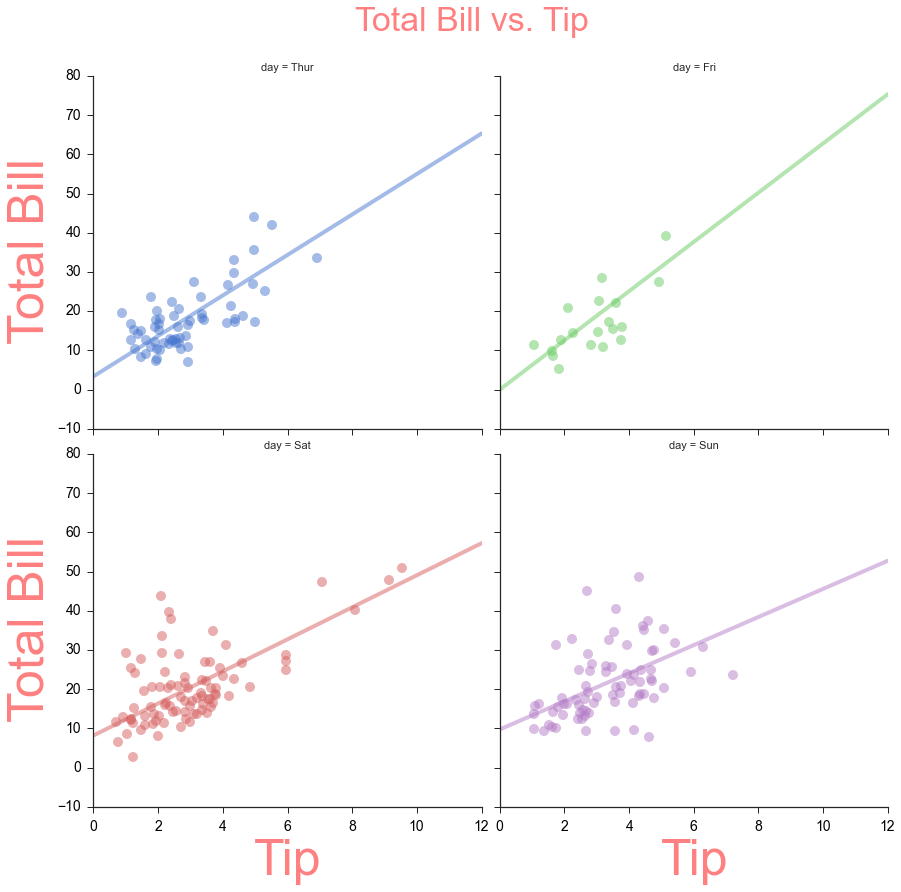

In [388]:
# So this function creates a faceted plot. The plot is parameterized by the following:

# col : divides the data points into days and creates that many plots
# palette: deep, muted, pastel, bright, dark, and colorblind. change the colors in graph. Experiment with these
# col_wrap: we want 2 graphs in a row? Yes.We do
# scatter_kws: attributes for points
# hue: Colors on a particular column.
# size: controls the size of graph

g = sns.lmplot(x="tip", y="total_bill",ci=None,data=tips, col="day",palette="muted",col_wrap=2,
          scatter_kws={"s": 100,"alpha":.5},line_kws={"lw":4,"alpha":0.5},hue="day",x_jitter=1.0,y_jitter=1.0,size=6)

# remove the top and right line in graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Total Bill vs. Tip', fontsize=34,color="r",alpha=0.5)

# Set the xlabel of the graph from here
g.set_xlabels("Tip",size = 50,color="r",alpha=0.5)

# Set the ylabel of the graph from here
g.set_ylabels("Total Bill",size = 50,color="r",alpha=0.5)

# Set the ticklabel size and color of the graph from here
titles = ['Thursday','Friday','Saturday','Sunday']
for ax,title in zip(g.axes.flat,titles):
    ax.tick_params(labelsize=14,labelcolor="black")

[**A side Note on Palettes**](http://stanford.edu/~mwaskom/software/seaborn/tutorial/color_palettes.html#building-color-palettes-with-color-palette): 

You can build your own color palettes using **color_palette()** function.
color_palette() will accept the name of any **seaborn palette** or [**matplotlib colormap**](http://matplotlib.org/users/colormaps.html) (except jet, which you should never use). It can also take a **list of colors** specified in any valid matplotlib format (RGB tuples, **hex color codes**, or HTML color names). 
The return value is always a list of RGB tuples. This allows you to use your own color palettes in graph.

#Barplots

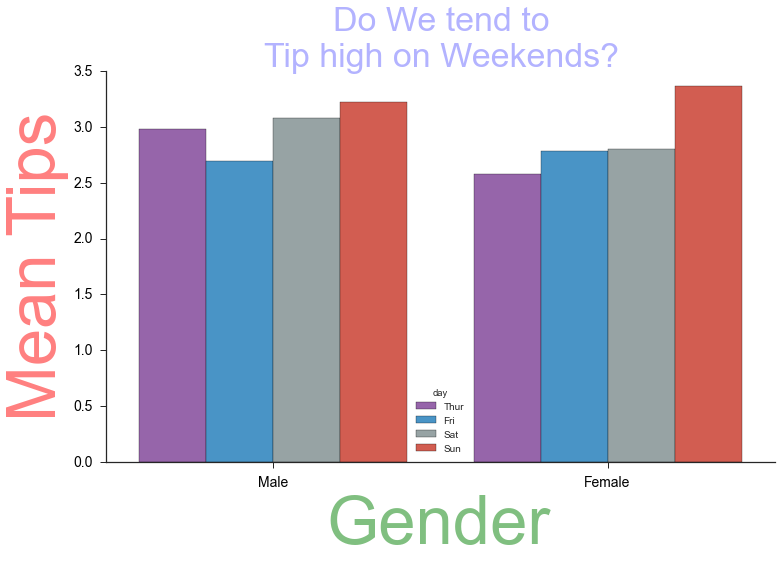

In [389]:
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]

# This Function takes as input a custom palette 
g = sns.barplot(x="sex", y="tip", hue="day", palette=sns.color_palette(flatui),data=tips,ci=None);

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Do We tend to \nTip high on Weekends?', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("Gender",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Mean Tips",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

#Histograms and Distribution Diagrams

They form another part of my workflow. Lets plot the normal Histogram using seaborn. 
For this we will use the [**distplot**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot) function. This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() function. 
It can also fit **scipy.stats** distributions and plot the estimated PDF over the data.

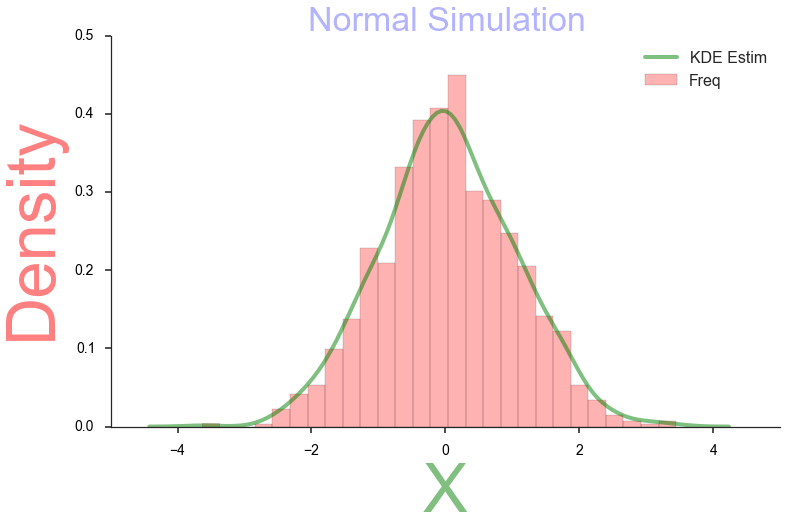

In [390]:
# Create a list of 1000 Normal RVs
x = np.random.normal(size=1000)

sns.set_context("poster")
sns.set_style("ticks")
# This  Function creates a normed Histogram by default. 
# If we use the parameter kde=False and norm_hist=False then we will be using a count histogram

g=sns.distplot(x,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})


# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title('Normal Simulation', fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("X",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

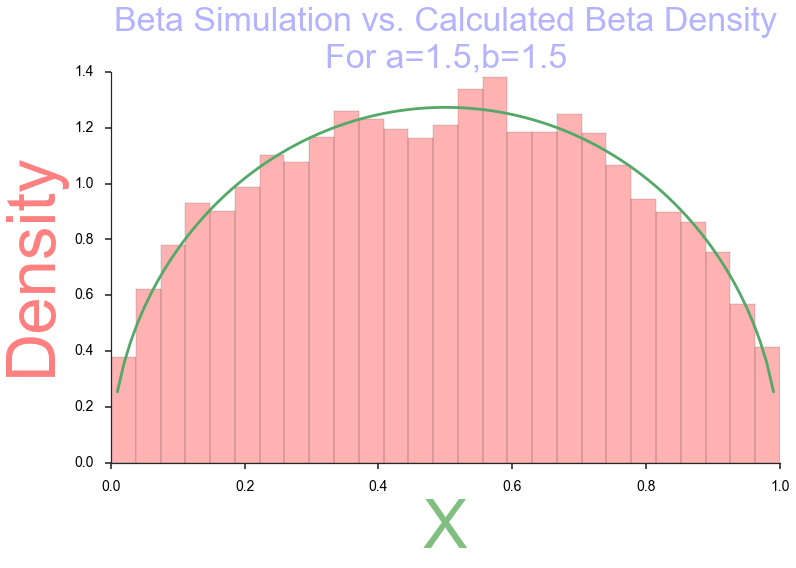

In [391]:
import scipy.stats as stats

a = 1.5
b = 1.5
x = np.arange(0.01, 1, 0.01)
y = stats.beta.rvs(a,b,size=10000)
y_act = stats.beta.pdf(x,a,b)
g=sns.distplot(y,kde=False,norm_hist=True,
            kde_kws={"color":"g","lw":4,"label":"KDE Estim","alpha":0.5},
            hist_kws={"color":"r","alpha":0.3,"label":"Freq"})
# Note that we plotted on the graph using plt matlabplot function
plt.plot(x,y_act)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(12,7)
# Set the Title of the graph from here
g.axes.set_title(("Beta Simulation vs. Calculated Beta Density\nFor a=%s,b=%s")%(a,b), 
                 fontsize=34,color="b",alpha=0.3)
# Set the xlabel of the graph from here
g.set_xlabel("X",size = 67,color="g",alpha=0.5)
# Set the ylabel of the graph from here
g.set_ylabel("Density",size = 67,color="r",alpha=0.5)
# Set the ticklabel size and color of the graph from here
g.tick_params(labelsize=14,labelcolor="black")

#PairPlots

You need to see how variables vary with one another. What is the distribution of variables in the dataset. This is the graph to use with the [**pairplot**](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot) function. Very helpful And Seaborn males it a joy to use. We will use Iris Dataset here for this example.

In [358]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


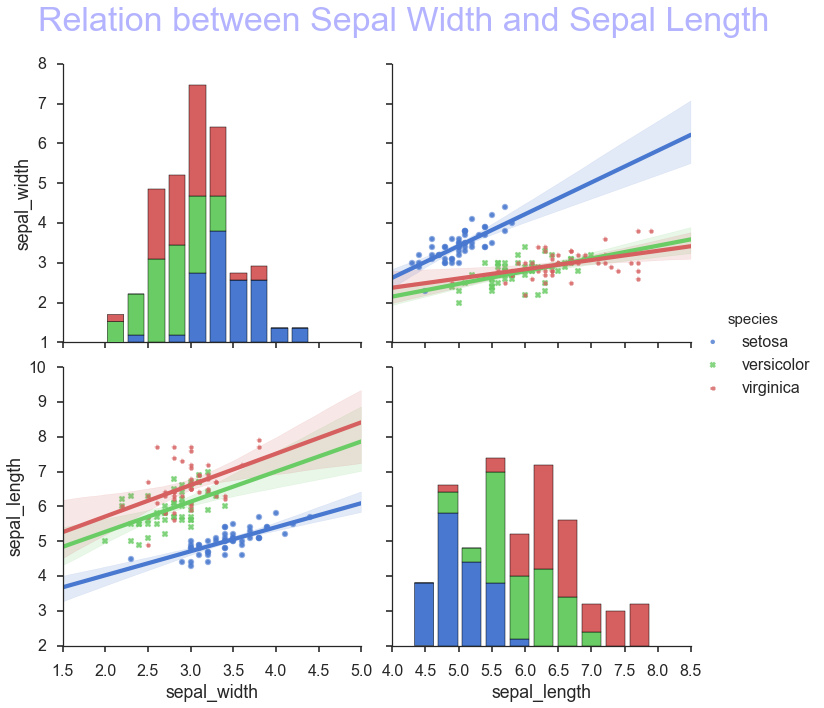

In [383]:
g = sns.pairplot(iris,hue="species",palette="muted",size=5,
                  vars=["sepal_width", "sepal_length"],kind='reg',markers=['o','x','+'])

# To change the size of the scatterpoints in graph
g = g.map_offdiag(plt.scatter,  s=35,alpha=0.5)

# remove the top and right line in graph
sns.despine()
# Additional line to adjust some appearance issue
plt.subplots_adjust(top=0.9)

# Set the Title of the graph from here
g.fig.suptitle('Relation between Sepal Width and Sepal Length', fontsize=34,color="b",alpha=0.3)

Hope you found this post useful and worth your time. 

I have tried to make this as simple as possible but You may always ask me or see the documentation for doubts.

If you have any more ideas on how to use Seaborn or on uncovered graphs you use in your day to day work, take my case in the comments section.

I will definitely try to add to this post as I start using more visualizations and encounter other libraries as good as seaborn.

Till then ciao!!